In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully.")

Libraries imported successfully.


Image loaded successfully.


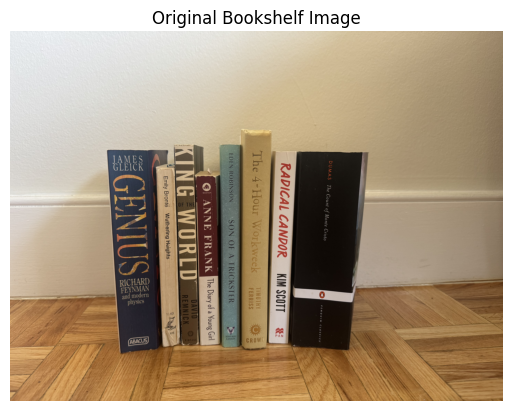

In [19]:
# Load the bookshelf image
img = cv2.imread('bookshelf.jpg')

# Check if the image loaded correctly
if img is None:
    print("Error: Could not load image. Please check the file path.")
else:
    print("Image loaded successfully.")
    # Display the original image using matplotlib (converting BGR to RGB for correct colors)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Bookshelf Image')
    plt.axis('off')
    plt.show()

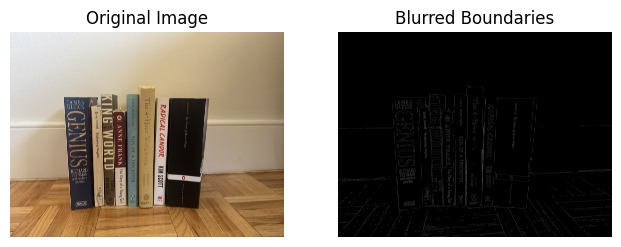

In [21]:
# Detect different books in image based on colour changes 

# Apply edge detection to find book boundaries
gray_quantized = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image to reduce noise
blurred = cv2.GaussianBlur(gray_quantized, (25, 25), 0)

canny = cv2.Canny(blurred, 10, 30)

# Display the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(canny, cmap='gray')
plt.title('Blurred Boundaries')
plt.axis('off')

plt.show()


48


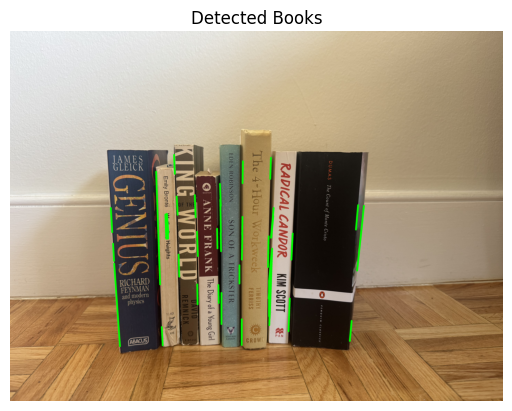

In [28]:
annotated = cv2.imread('bookshelf.jpg')

# 3. Hough transform parameters
rho = 10               # distance resolution in pixels
theta = np.pi / 180   # angle resolution in radians (1°)
threshold = 10       # minimum votes (intersections) to “detect” a line
min_line_length = 200  # minimum length of a line (in pixels)
max_line_gap = 20     # maximum gap between segments to link them

# 4. Run Probabilistic Hough Transform
lines = cv2.HoughLinesP(canny,
                        rho=rho,
                        theta=theta,
                        threshold=threshold,
                        minLineLength=min_line_length,
                        maxLineGap=max_line_gap)

vertical_lines = []
angle_tolerance = 10 * np.pi/180   # ±5° tolerance

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.arctan2((y2 - y1), (x2 - x1))
        if abs(abs(angle) - np.pi/2) < angle_tolerance:
            vertical_lines.append((x1, y1, x2, y2))
            cv2.line(annotated, (x1, y1), (x2, y2), (0,255,0), 20)

# If no lines were found, 'vertical_lines' just stays empty—no need for ambiguous `or []`.
print(len(vertical_lines))   

# show img
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.title('Detected Books')
plt.axis('off')
plt.show()



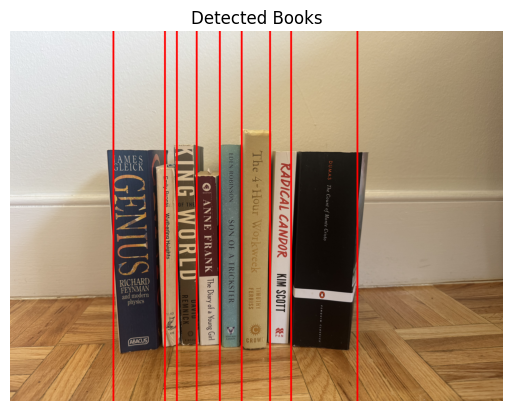

: 

In [ ]:
newly = cv2.imread('bookshelf.jpg')


x_coords = np.array([ (x1+x2)/2 for (x1,y1,x2,y2) in vertical_lines ], dtype=np.float32).reshape(-1,1)

n = 9
criteria = (cv2.TermCriteria_EPS + cv2.TermCriteria_MAX_ITER, 100, 0.1)
flags = cv2.KMEANS_PP_CENTERS
attempts = 10

# 3) run kmeans
compactness, labels, centers = cv2.kmeans(
    data      = x_coords,
    K         = n,
    bestLabels= None,
    criteria  = criteria,
    attempts  = attempts,
    flags     = flags
)

book_centers = sorted(centers.flatten())

for x in book_centers:
    x_int = int(round(x))
    cv2.line(newly, (x_int, 0), (x_int, newly.shape[0]), (0,0,255), 20)

plt.imshow(cv2.cvtColor(newly, cv2.COLOR_BGR2RGB))
plt.title('Detected Books')
plt.axis('off')
plt.show()